<a href="https://colab.research.google.com/github/maiphuctram/Colab/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


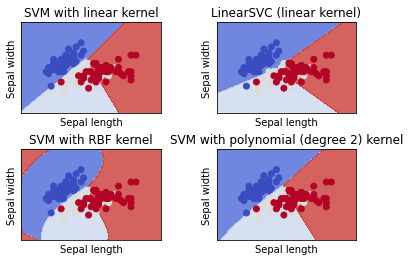

In [ ]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

def getData():
    # Get iris data from datasets
    iris = datasets.load_iris()

    return iris

def get2DPlot(iris):
    X = iris.data[:, :2]  #  Take two features
    Y = iris.target
    X_min, X_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    Y_min, Y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    plt.figure(2, figsize=(8, 6))
    plt.clf()

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(X_min, X_max)
    plt.ylim(Y_min, Y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

def getSVMPlot(iris):
    X = iris.data[:, :2]  # we only take the first two features. We could
    # avoid this ugly slicing by using a two-dim dataset
    y = iris.target

    h = .01  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVM with linear kernel',
              'LinearSVC (linear kernel)',
              'SVM with RBF kernel',
              'SVM with polynomial (degree 2) kernel']

    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

if __name__ == "__main__":
    iris = getData()
    if iris is not None:
        getSVMPlot(iris)